In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

In [12]:
def ChebT_Diff_Trefethen(f):
    # Finding derivatives at Chebyshev points
    # Trefethen's method
    # f = {fj: j=0,1,...,N}
    
    N = len(f) - 1
    J = np.arange(0, N+1)
    theta = np.pi/N * J
    
    # Extend f
    # f0, f1,..., fN-1, fN, fN-1, ... f1
    f = np.concatenate((f, f[N-1:0:-1]))
    
    # DFT 
    F = np.real(fft(f) / (2*N))
    
    # DFT of the derivatives
    F_deri = np.concatenate((F[0:N] * np.arange(0,N) * 1j, 
                             F[N:2*N] * np.arange(-N, 0) * 1j))
    F_deri[N] = 0
    
    # Derivative wrt theta
    f_deri = np.real(ifft(F_deri) * (2*N))
    
    # Derivatives wrt x, j=1,...,N-1
    f_deri[1:N] /= -np.sin(theta[1:N])
    
    # Derivatives wrt x, j=0, N
    a = 2 * F[0:N+1]
    a[0] *= 0.5
    a[N] *= 0.5
    f_deri[0] = np.sum(a * J * J)
    f_deri[N] = -np.sum(a * J * J * (-1)**J)
    
    return f_deri[0:N+1]
    
    
    

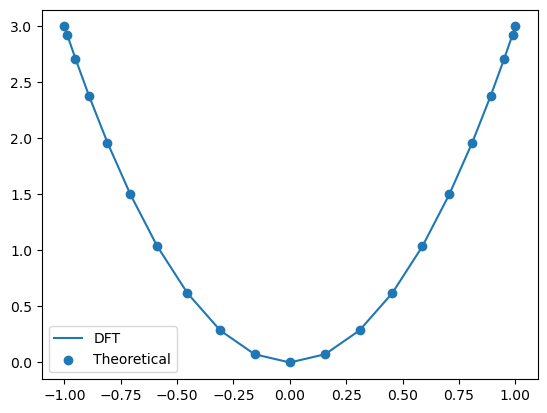

In [13]:
# Testing
N = 20
J = np.arange(0, N+1)
theta = np.pi/N * J
x = np.cos(theta)

f = x**3
f_deri = 3 * x**2
f_deri_DFT = ChebT_Diff_Trefethen(f)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f_deri_DFT, label='DFT')
ax.scatter(x, f_deri, label='Theoretical')
ax.legend()

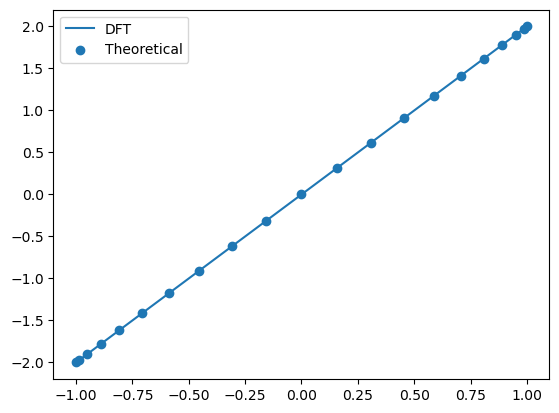

In [14]:
# Testing
N = 20
J = np.arange(0, N+1)
theta = np.pi/N * J
x = np.cos(theta)

f = x**2
f_deri = 2 * x
f_deri_DFT = ChebT_Diff_Trefethen(f)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f_deri_DFT, label='DFT')
ax.scatter(x, f_deri, label='Theoretical')
ax.legend()

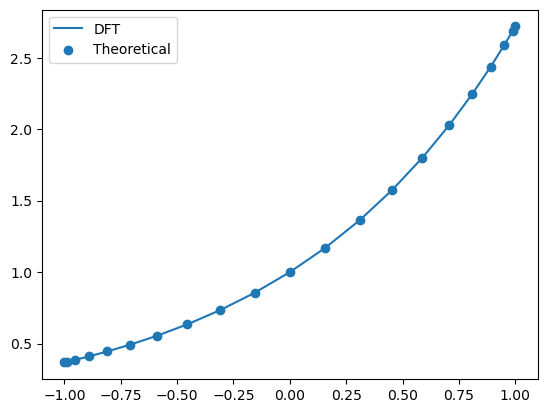

In [15]:
# Testing
N = 20
J = np.arange(0, N+1)
theta = np.pi/N * J
x = np.cos(theta)

f = np.exp(x)
f_deri = np.exp(x)
f_deri_DFT = ChebT_Diff_Trefethen(f)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f_deri_DFT, label='DFT')
ax.scatter(x, f_deri, label='Theoretical')
ax.legend()